# Tutorial: Interactive Post-Processing of Yelmo Results

#### Introduction

PostProYelmo (PPY) is a post-processing library, essentially designed such that Yelmo users can access:
- Multiple yelmo results at the same time, more specifically...
- Interactive 1D plots of their results.
- Interactive 1D plots of 2D variables masked over a regions.
- Interactive 2D plots of their results.
- Interactive 2D error plots of their results.
- Interactive 2D difference plots between two frames within the same experiment or even across different experiments.
- Evolution plot of the same variable over defined frames.
- Video of desired variables.
- Saving these plots for publications.
- Computing the error metrics based on the three observables we have (ice thickness, surface velocity, grounding line position).

The major disadvantage compared to ncview is the inability to open a 1d plot by clicking on a 2D one.

Let's now dive into the basic functionalities of PPY and understand what makes it appealing compared to ncview.

### I. Preliminaries

First, we import it:

In [4]:
import ppy
import numpy as np
from IPython.display import display, clear_output

#### Setting Suited Plotting Backend

matplotlib offers a wide range of backends. Whereas *inline* is better suited for a use within the jupyter extension of VS Code, *notebook* is recommended if you use a pure notebook environment.

In [5]:
%matplotlib inline
# %matplotlib notebook

#### Getting the Files of Interest

While ncview relies on opening a single file containing the results of many variables, PPY opens many files and focus on certain variables. Comparing results thus gets easier, as we can study all the results within a specified folder (and all its children folders) with a single call.

We simply need to define the path of the parent folder and the variables of interest:

In [6]:
path = "/home/jan/yelmo-ucm/old_yelmo_versions/yelmox_v1.64/output/aqef"   # Parent folder

var1Dlist = ["hyst_f_now", "V_dT", "V_ice", "V_ice_f"]  # List of 1D variables, can be adapted as wished by the user.
var2Dlist = ["Ta_ann", "smb", "N_eff", "bmb"]           # List of 2D variables, cannot be adapted as we have some specific colormaps for these.

list_nc1D, list_nc2D = ppy.get_file_lists(path)         # Get the list of paths for the result files
ppy.print_indexed_namelist(list_nc1D, list_nc2D)        # Print the list of the paths to results.

index: 0     /home/jan/yelmo-ucm/old_yelmo_versions/yelmox_v1.64/output/aqef/dtt=0.5yr/yelmo1D.nc /home/jan/yelmo-ucm/old_yelmo_versions/yelmox_v1.64/output/aqef/dtt=0.5yr/yelmo2D.nc
-----------------------------
index: 1     /home/jan/yelmo-ucm/old_yelmo_versions/yelmox_v1.64/output/aqef/dtt=1.0yr/yelmo1D.nc /home/jan/yelmo-ucm/old_yelmo_versions/yelmox_v1.64/output/aqef/dtt=1.0yr/yelmo2D.nc
-----------------------------
index: 2     /home/jan/yelmo-ucm/old_yelmo_versions/yelmox_v1.64/output/aqef/dtt=2.0yr/yelmo1D.nc /home/jan/yelmo-ucm/old_yelmo_versions/yelmox_v1.64/output/aqef/dtt=2.0yr/yelmo2D.nc
-----------------------------
index: 3     /home/jan/yelmo-ucm/old_yelmo_versions/yelmox_v1.64/output/aqef/dtt=5.0yr/yelmo1D.nc /home/jan/yelmo-ucm/old_yelmo_versions/yelmox_v1.64/output/aqef/dtt=5.0yr/yelmo2D.nc
-----------------------------
index: 4     /home/jan/yelmo-ucm/old_yelmo_versions/yelmox_v1.64/output/aqef/dtt=10.0yr/yelmo1D.nc /home/jan/yelmo-ucm/old_yelmo_versions/yelmox_v1.

#### Filtering the File List

Sometimes, not all the experiments of a folder are of interest. Based on their indexing we can simply filter them out by providing a vector taking care of the selection:

In [7]:
# Here we omit the second experiment to illustrate the idea.
indices = [0,1,3,4]
list_nc1D, list_nc2D = ppy.filter_file_lists(list_nc1D, list_nc2D, indices)

# Print the filtered list of results.
ppy.print_indexed_namelist(list_nc1D, list_nc2D)

index: 0     /home/jan/yelmo-ucm/old_yelmo_versions/yelmox_v1.64/output/aqef/dtt=0.5yr/yelmo1D.nc /home/jan/yelmo-ucm/old_yelmo_versions/yelmox_v1.64/output/aqef/dtt=0.5yr/yelmo2D.nc
-----------------------------
index: 1     /home/jan/yelmo-ucm/old_yelmo_versions/yelmox_v1.64/output/aqef/dtt=1.0yr/yelmo1D.nc /home/jan/yelmo-ucm/old_yelmo_versions/yelmox_v1.64/output/aqef/dtt=1.0yr/yelmo2D.nc
-----------------------------
index: 2     /home/jan/yelmo-ucm/old_yelmo_versions/yelmox_v1.64/output/aqef/dtt=5.0yr/yelmo1D.nc /home/jan/yelmo-ucm/old_yelmo_versions/yelmox_v1.64/output/aqef/dtt=5.0yr/yelmo2D.nc
-----------------------------
index: 3     /home/jan/yelmo-ucm/old_yelmo_versions/yelmox_v1.64/output/aqef/dtt=10.0yr/yelmo1D.nc /home/jan/yelmo-ucm/old_yelmo_versions/yelmox_v1.64/output/aqef/dtt=10.0yr/yelmo2D.nc
-----------------------------


Notice that the indices attributed to each file are updated by the filtering procedure.

#### Generating Post-Processing Instances

PPY essentially distinguishes between 1D and 2D outputs and therefore handles them by two seperate classes.

In [8]:
instance1D = ppy.postpro_data1D(list_nc1D)
instance2D = ppy.postpro_data2D(list_nc2D)

### II. 1D Post-Processing

#### Loading the Desired Variables

As not all the variables are of interest, we only load the ones needed in order to keep the memory usage low:

In [24]:
ppy.load_variables(instance1D, var1Dlist)



#### Defining the Characteristics of the Future 1D Plots

Here we can specifiy what we want in terms of labels, ticks... etc.
Any user-defined label must be latex-interpretable. If we wish to leave out an option given by the standard dicitonnary, we simply set it to *None*.

In [25]:
ftr_dict = dict()
ftr_dict["xlabels"] = [r"$t \: \mathrm{[kyr]}$", r"$T \: \mathrm{[\degree \, C]}$", r"$t \: \mathrm{[kyr]}$", r"$t \: \mathrm{[kyr]}$"]
ftr_dict["ylabels"] = [r"$f \: \mathrm{[\degree \, C]}$", r"$V \: \mathrm{[10^6 \, km^3]}$", r"$V \: \mathrm{[10^6 \, km^3]}$", r"$V_{f} \: \mathrm{[10^6 \, km^3]}$"]
ftr_dict["grid_bool"] = True

t_yr = np.arange(0, 180e3+20e3, 20e3).astype(int)
t_kyr = (1e-3 * t_yr).astype(int)
ftr_dict["xticks"] = [t_yr, None, t_yr, t_yr]
ftr_dict["xticklabels"] = [t_kyr, None, t_kyr, t_kyr]

#### Creating a 1D Interactive Plot

As the instance was previously initiated and the variables loaded, we now merely need to specify which variables we want to plot (they must have been previously loaded) and what are the features of this plot. The widget type can be chosen between *dropdown* and *slider* depending on your preference.

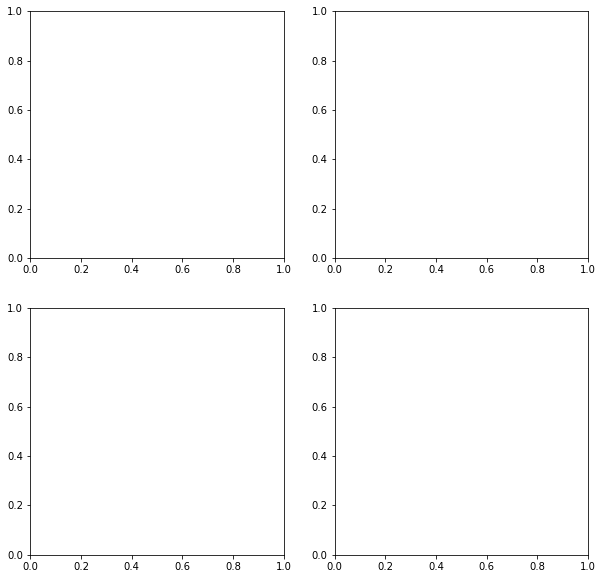

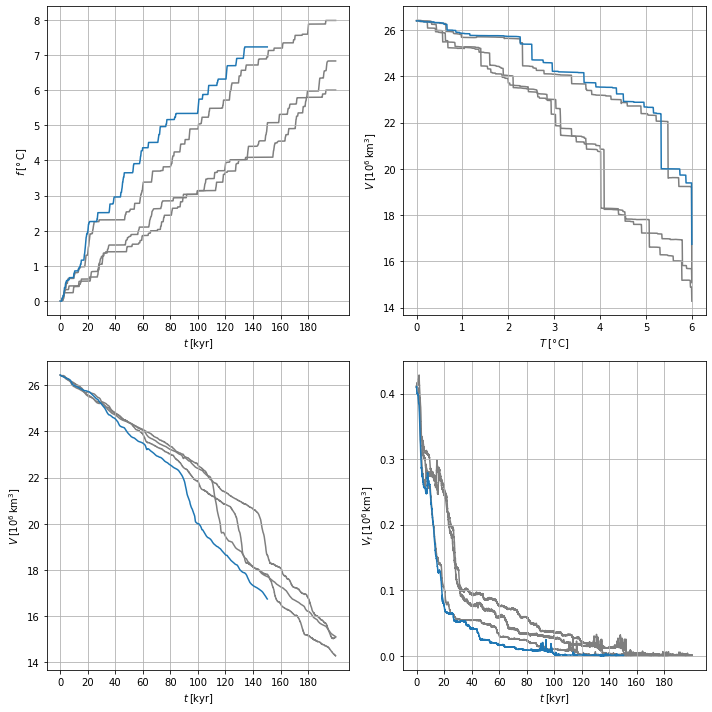

interactive(children=(Dropdown(description='ix', options=('0', '1', '2', '3'), value='0'), Output()), _dom_cla…

In [27]:
plotvar1Dlist = var1Dlist
ppy.interactive_1Dplot(instance1D, plotvar1Dlist, plot_features=ftr_dict, nrw=2, ncl=2, plot_size=(10,10), hl_lw=2, widget_type="dropdown")

#### Save Results of Interest

Sometimes, we play around with the sliders and suddenly the magic takes places: a beautiful figure arises and we cannot do anything else then urgently wanting to save it into a neat format for publications (or just bragging). PPY offers this possibility by a simple command, where the file path, name and extension has to be provided.

If one exports to a pdf-format, margins can sometimes be annoying. If pdfcrop is installed, one can even directly crop the obtained pdf file with the *crop_plot* command.

A simple *if* statement is placed before, so that this part of the code can be easily ignored.

In [11]:
if False:
  ppy.save_plot(instance1D, "test1D.pdf")
  ppy.crop_plot(instance1D)

#### Plot 2D Variables Masked Over a Region

Sometimes, we are interested in obtaining the 1D results for a specific region. For now we have the choice among any combination involving:
- Antarctic peninsula (5)
- West-Antarctica     (3)
- East-Antarctica     (4)

First, we might want to check whether our mask is correctly selected. If we are already sure about this, we can win some time and reduce output by setting *visualise=False*.

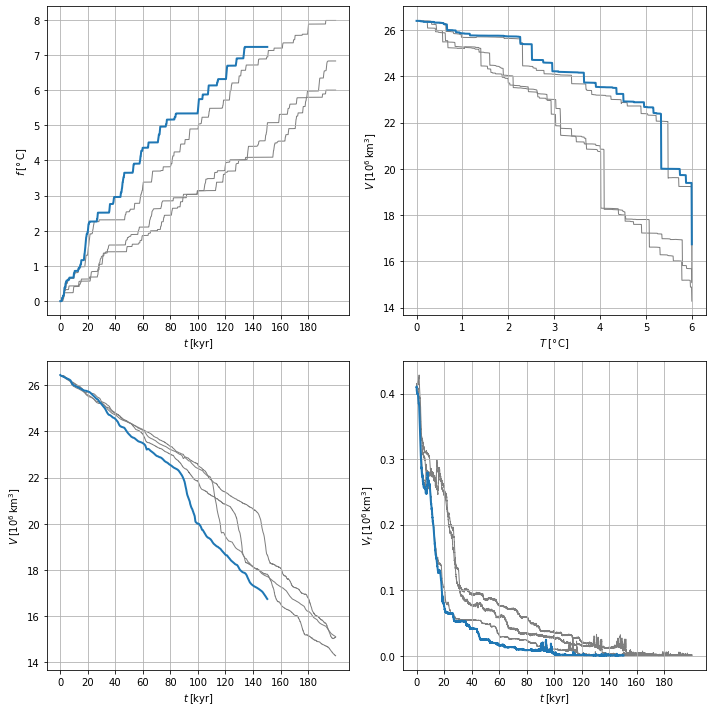

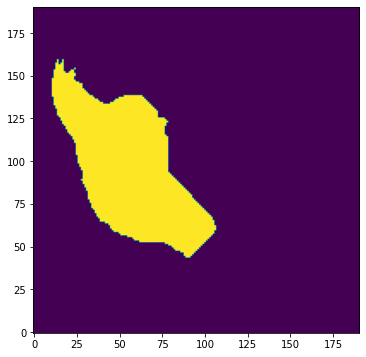

In [12]:
mask = ppy.get_mask(instance2D, [3, 5], visualise=True)

We now plot the result of the masking procedure. Again, most plot feature can be handled by a dictionnary and the remaining ones can be directly changed by accessing the matplotlib axs.

In [13]:
ftr_dict = dict()
ftr_dict["xlabels"] = [r"$t \: \mathrm{[kyr]}$", r"$t \: \mathrm{[kyr]}$", r"$t \: \mathrm{[kyr]}$", r"$t \: \mathrm{[kyr]}$"]
ftr_dict["ylabels"] = [r"$f \: \mathrm{[\degree \, C]}$", r"$\dot{V} \: \mathrm{[10^6 \, km^3 \, yr^{-1}]}$", r"$V \: \mathrm{[10^6 \, km^3]}$", r"$V_{f} \: \mathrm{[10^6 \, km^3]}$"]
ftr_dict["grid_bool"] = True

t_yr = np.arange(0, 180e3+20e3, 20e3).astype(int)
t_kyr = (1e-3 * t_yr).astype(int)
ftr_dict["xticks"] = [t_yr, t_yr, t_yr, t_yr]
ftr_dict["xticklabels"] = [t_kyr, t_kyr, t_kyr, t_kyr]

#### Plotting Masked Series



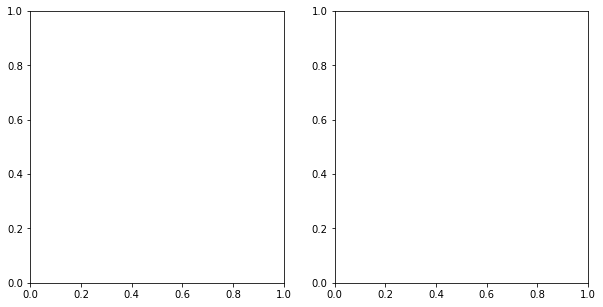

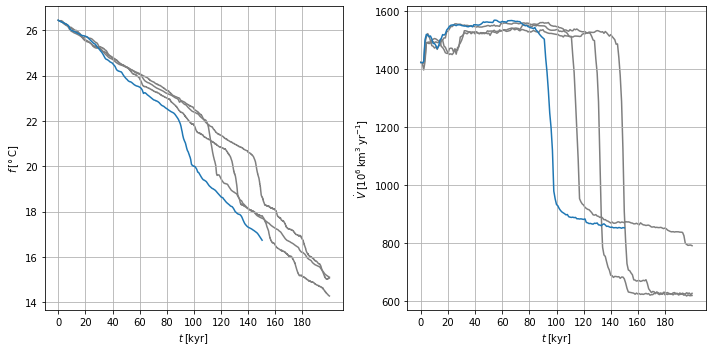

interactive(children=(Dropdown(description='ix', options=('0', '1', '2', '3'), value='0'), Output()), _dom_cla…

(0.0, 180000.0)

In [14]:
ppy.mask_2D_to_1D(instance1D, instance2D, ["H_ice"], mask, scale_factor=1, average_method="ice-sheet")
ppy.interactive_1Dplot(instance1D, ["V_ice", "masked_H_ice"], nrw=1, ncl=2, plot_size=(10,5), hl_lw=2, plot_features=ftr_dict, widget_type="dropdown")
instance1D.axs[0].set_xlim([t_yr[0], t_yr[-1]])
instance1D.axs[1].set_xlim([t_yr[0], t_yr[-1]])

### III. Creating a 2D Post-Processing Instance and Intercative Plotting

Similar functionalities are available for 2D outputs and are now demonstrated.

As plotting the ice thickness, outward velocity and their error with respect to present-day state is an usual operation, we can call the plotting command for that very easily by specifying "observables" in the *interactive_2Dplots* function. These variables dispose of hand-designed colormaps such that the plotting is directly ready for being used in publications.

Notice that in order to compare two results of the same instance, one can simply copy-paste the call of the interactive plot and thus have two seperate slider-instances.

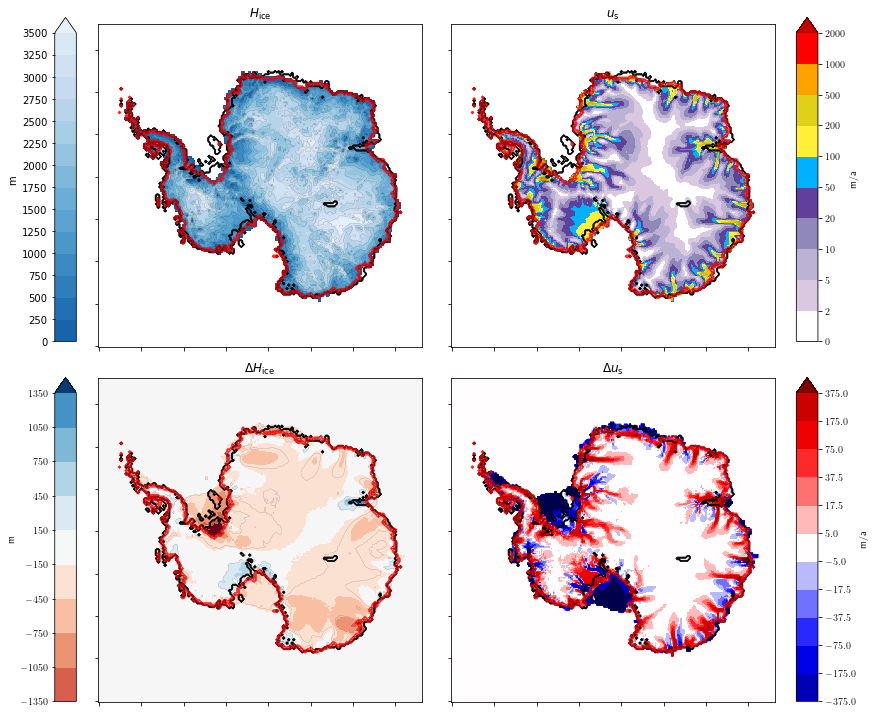

/home/jan/yelmo-ucm/postprocess-yelmo/ppy.py:496: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


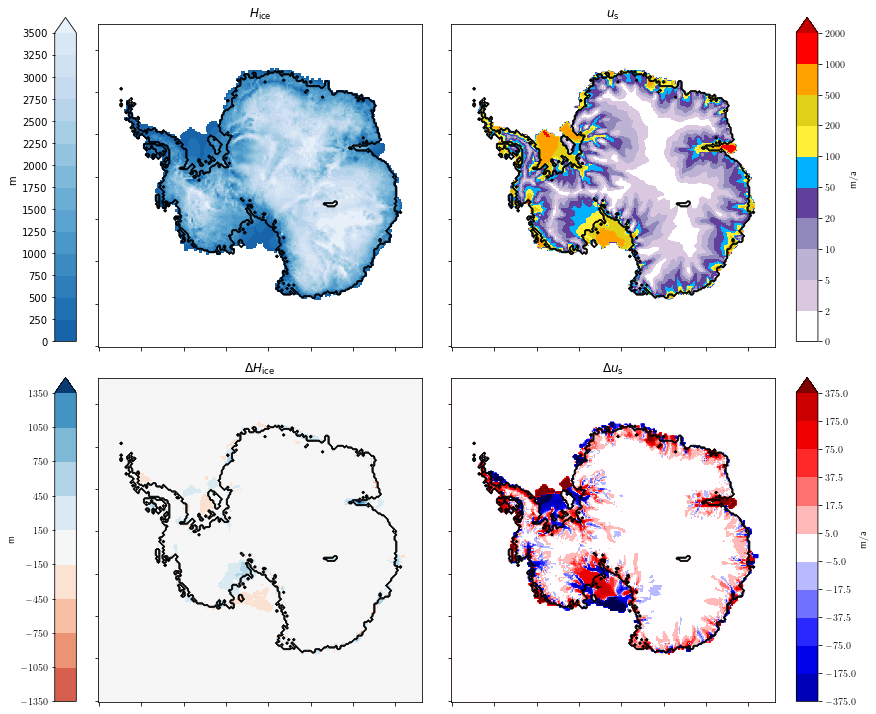

interactive(children=(Dropdown(description='ix', options=('0', '1', '2', '3'), value='0'), Output()), _dom_cla…

In [15]:
observables = ["H_ice", "uxy_s", "H_ice_pd_err", "uxy_s_pd_err"]
ppy.interactive_2Dplots(instance2D, plotvar2Dlist=observables, nrw=2, ncl=2, plot_size=(10,10), hl_lw=2,
                        plot_type="simple", widget_type="dropdown")

#### Add Contours to a Plot

As the matplotlib function *contour* does not have a *set_data* option, we only apply it for a desired experiment and frame by specifying them as input of the *update_2D* function while passing *with_contour=True*. Notice that it is only something that is plot at the end and therefore it does not clear previous plots!

In [16]:
instance2D.update2D(2, 85, with_contour=True)

In [17]:
if False:
    ppy.save_plot(instance2D, "test2D.pdf")
    ppy.crop_plot(instance2D)

#### Generate a Video of an Experiment

Here we can generate a video of the 2D results with a single command specifying:
- The output file path and name (without extension). 
- The variables to animate.
- The index of the experiment to animate.
- Optional: the frames per second, maximum number of frames. 

In [18]:
if False:
    instance2D.make2Dvideo("plots/test", plotvar2Dlist=observables, ix=0, fps=6, max_nf=130, tickstyle=None)

#### Evolution Plot

For a journal format, we might want to have an evolution plot rather than a video. This is also possible by a single call.

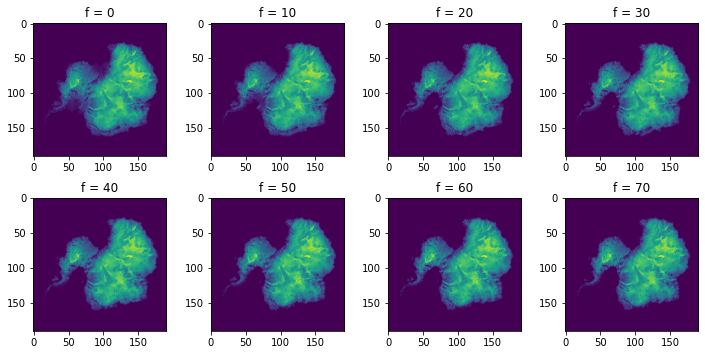

In [19]:
instance2D.evolution2Dplot(ix=0, frames=np.arange(0, 80, 10), plotvar="H_ice", nrw=2, ncl=4, plot_size=(10, 5))

### Plot User-defined Variables

If we want to plot the variables specified above instead of the observables, we merely need to load them into the 2D-data instance and subsequently sepcify them in the interactive plot command.

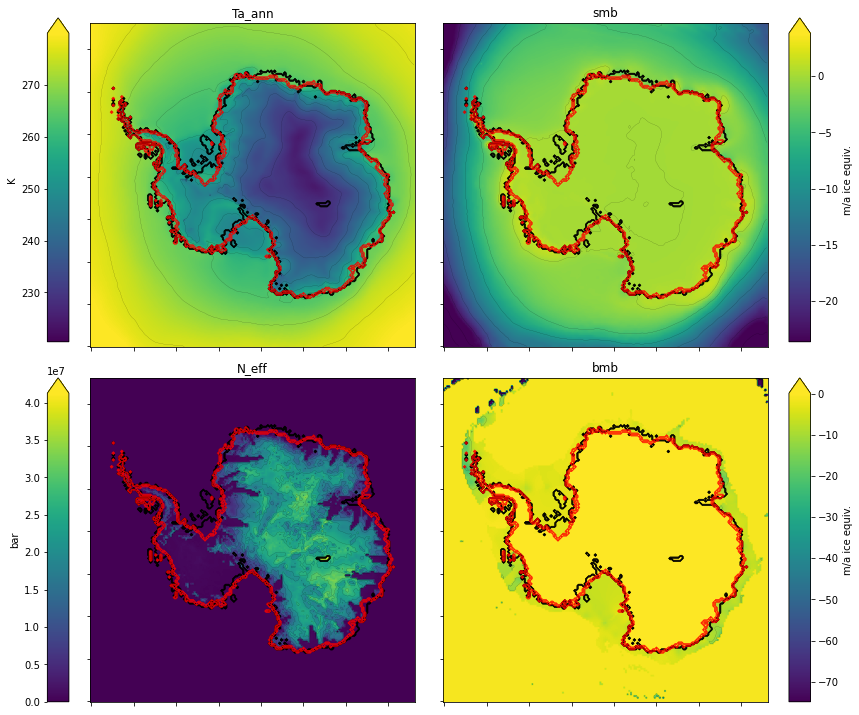

/home/jan/yelmo-ucm/postprocess-yelmo/ppy.py:496: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


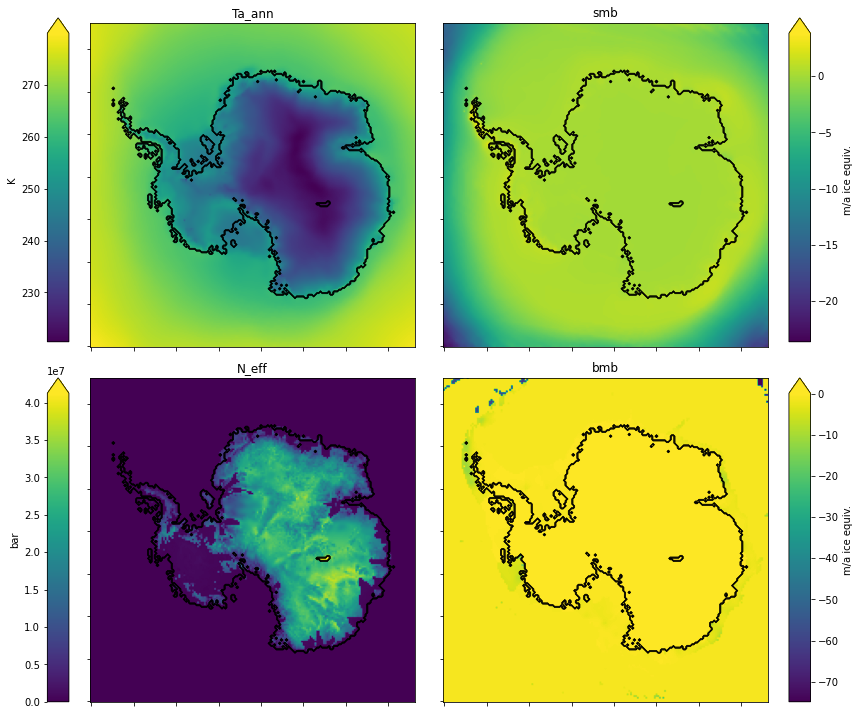

interactive(children=(Dropdown(description='ix', options=('0', '1', '2', '3'), value='0'), Output()), _dom_cla…

In [20]:
ppy.load_variables(instance2D, var2Dlist)
ppy.interactive_2Dplots(instance2D, plotvar2Dlist=var2Dlist, nrw=2, ncl=2, plot_size=(10,10), hl_lw=2, plot_type="simple", widget_type="dropdown")

In [21]:
instance2D.update2D(2, 100, with_contour=True)

### Difference Plots

Unlike ncview, PPY allows the user to make difference plots of the selected variables. 

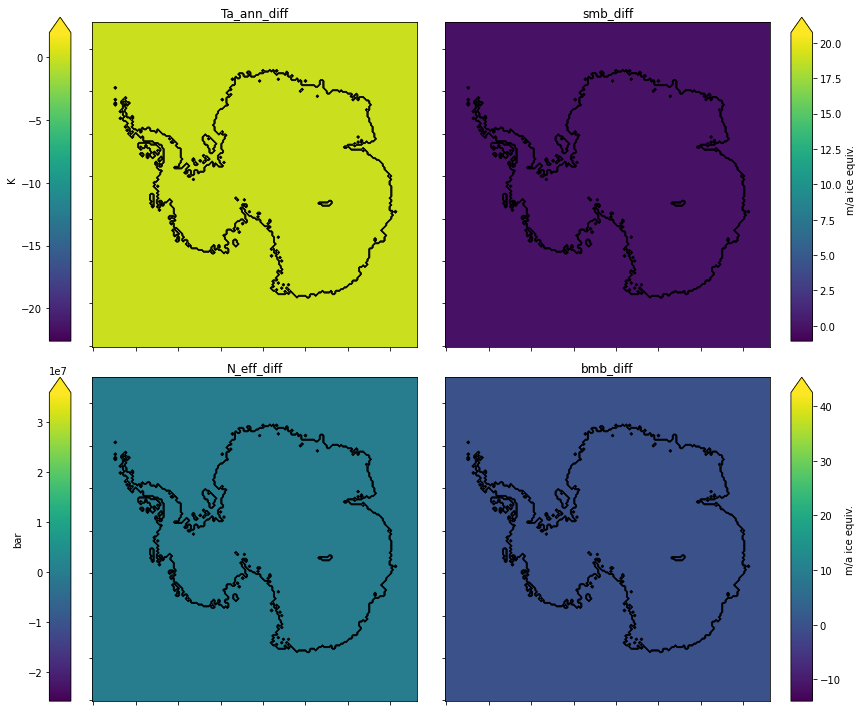

/home/jan/yelmo-ucm/ppy/ppy.py:536: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


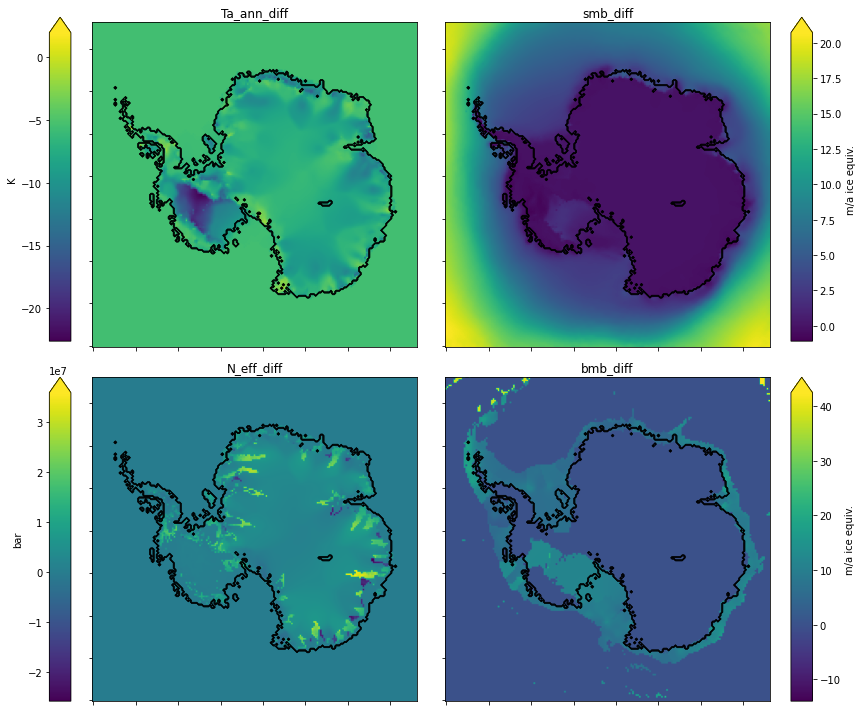

interactive(children=(Dropdown(description='ix1', options=('0', '1', '2', '3'), value='0'), Dropdown(descripti…

interactive(children=(Dropdown(description='frame1', options=('0', '1', '2', '3', '4', '5', '6', '7', '8', '9'…

In [19]:
ppy.interactive_2Dplots(instance2D, plotvar2Dlist=var2Dlist, nrw=2, ncl=2, plot_size=(10,10), hl_lw=2, plot_type="diff", widget_type="dropdown")

### Getting the Error Measures

While studying the full 2D results is of great importance for the physical understanding, sometimes one might want to compare the error of varioous frames by considering a scalar measure. This is particularly important for any automated procedure relying on error measures, like e.g. a parameter optimisation.

We compute a weighted RMSE (WRMSE), to obtain a scalar measure of the error wrt present day:

$$ WRMSE = \alpha_{1} \, RMSE(H_\mathrm{ice}) + \alpha_{2} \, RMSE(u_\mathrm{s}) + \alpha_{3} \, RMSE(F_\mathrm{grline}) $$

We choose $\alpha$ to be the inverse of the characteristic scales (as defined in Greve and Blatter) associated with each error variable.

In [22]:
H_char = 1000                       # in m
u_xy_char = 100                     # in m/a
grline_char = np.inf                # in m
alpha = 1/np.array([H_char, u_xy_char, grline_char])

instance2D.get_error(alpha)
print(instance2D.error_matrix)

[[  0.      1.754 709.594 104.438 126.892]
 [  1.      1.884 852.578 103.153 131.432]
 [  2.      1.738 874.798  86.317 139.5  ]
 [  3.      1.83  938.958  89.141 139.232]]


If we have many results, two things might help to interpret the output more easily:
- Sort it depending on RMSE.
- Truncate the sorted table.

This is handled by the *get_min_error_candidates*-function:

In [23]:
instance2D.get_min_error_candidates(4)
print(instance2D.sorted_error)

[[  2.      1.738 874.798  86.317 139.5  ]
 [  0.      1.754 709.594 104.438 126.892]
 [  3.      1.83  938.958  89.141 139.232]
 [  1.      1.884 852.578 103.153 131.432]]
